(1010,) (1010, 2)


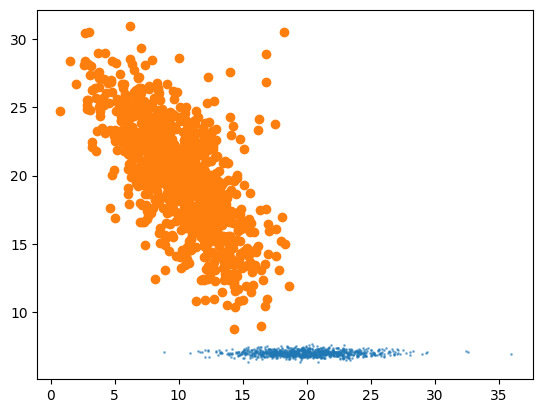

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
d1 = np.loadtxt("C:/Users/rlaeo/Downloads/Outliers (1)/outlier_1d.txt")
d2 = np.loadtxt("C:/Users/rlaeo/Downloads/Outliers (1)/outlier_2d.txt")
d3 = np.loadtxt("C:/Users/rlaeo/Downloads/Outliers (1)/outlier_curve.txt")
print(d1.shape,d2.shape)

plt.scatter(d1,np.random.normal(7,0.2,size=d1.size), s=1, alpha=0.5)
#  random.normal 함수를 이용해 7을 평균값으로 하고 0.2를 표준편차로 하는 정규분포를 따르는 난수를 생성
plt.scatter(d2[:,0],d2[:,1])
plt.show()
plt.plot

Rejection 5 points
z-score of 3 corresponds to a prob of 0.27%


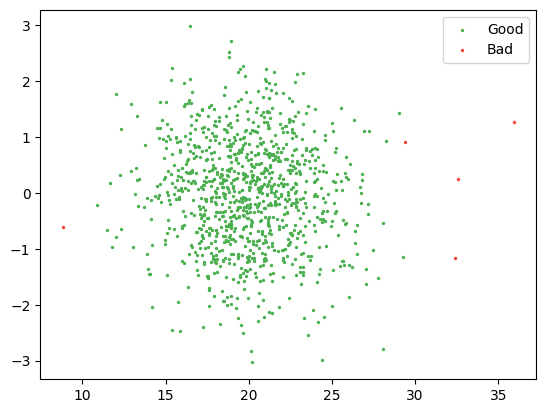

In [14]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1-mean)/std)
threshold = 3
good = z_score < threshold
print(f"Rejection {(~good).sum()} points")# ~: 결과값 뒤집기
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color = "#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=2, label='Bad', color = '#F44336')
plt.legend()